## Clasificación de dígitos

Vamos con un ejemplo un poco más vistoso: vamos a clasificar imágenes. En concreto, vamos a crear un clasificador de dígitos que pueda identificar un número basado en su trazo.

Para ello, comenzamos cargando las librerías:

In [150]:
import numpy as np
from sklearn.datasets import load_digits

#### Cargamos el dataset

Vamos a utilizar un dataset que ya viene incluido en sklearn:

In [151]:
digits = load_digits()

In [152]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Como podemos comprobar, tiene la misma estructura que los datasets que ya hemos visto anteriormente de sklearn. Esta estructura nos facilita la separación train-test, entre otras cosas. Veamos los tamaños de lo que tenemos:

In [153]:
digits.data.shape

(1797, 64)

Como podemos ver, estamos ante una matriz de 1797 x 64, lo que significa que tenemos 1797 registros para fotos de 8x8 (64 pixels).

En cuanto al target, son los números del 0 al 9:

In [154]:
np.histogram(digits.target, bins=10)

(array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

#### Analizando el dataset

A continuación, vamos a hacer un par de tareas sobre el dataset. En primer lugar, nos vamos a crear un DataFrame a partir de los datos que disponemos:

In [155]:
import pandas as pd

df = pd.DataFrame(digits.data)
df['number'] = digits.target

df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


Una vez creado, vamos a comprobar aquellos registros que hacen referencia al número 1:

In [156]:
df[df['number'] == 1]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,number
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1
42,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,16.0,8.0,0.0,0.0,1
47,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0.0,0.0,4.0,10.0,12.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,10.0,0.0,0.0,0.0,1
1757,0.0,0.0,4.0,16.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,2.0,0.0,0.0,1
1760,0.0,0.0,1.0,12.0,10.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,7.0,12.0,10.0,0.0,0.0,1
1766,0.0,0.0,8.0,12.0,11.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,11.0,12.0,7.0,0.0,0.0,1


Además, vamos a ver cómo se dsitribuyen cada uno de los pixels del dataset:

In [157]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,number
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


También podemos comprobar cómo son los números que tenemos en el target, que supuestamente tendrían que ser del 0 al 9:

In [158]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [159]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

Y para muestra un botón, vamos a mostrar algunos ejemplos de los números. Pondremos tanto la imagen (X) como el valor que representan (y). No hae falta que entandos qué hace el código línea por línea, ni saber representar las imágenes, esto lo estamos utilizando para dalre un contexto más interesante a este tipo de ejercicios:

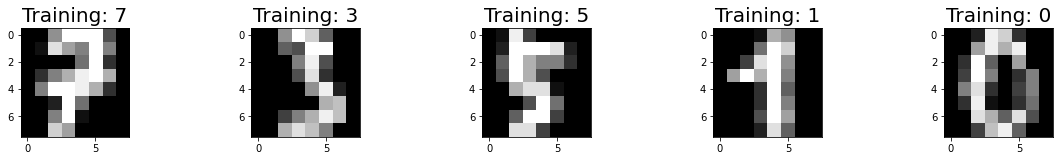

In [160]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[44:49], digits.target[44:49])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: ' + str(label), fontsize = 20)

### Creando el modelo

Ahora sí. Hasta aquí todo había sido un poco ilustrativo sobre lo que teníamos entre manos. Pero, como has visto, todo se resume a lo que ya tenñiamos antes: una serie de registros con ciertas columnas a las que se les asocia un valor que tenemos de predecir. Pese a que estemos tratando con imágenes, en el fondo no deja de ser un conjunto de datos estructurado. Por ello, podemos trabajar como hemos hecho hasta ahora:

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    test_size=0.25,
    random_state=42)

In [162]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=2000)
# el paámetro max_iter hay que establecerlo en un número alto para que converja (si no da errores)

logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

### ¿Tendremos éxito?

Ahora nos queda la mejor parte: predecir. En este apartado, al igual que en otros anteriores, volveremos a utilizar funciones propias de la representación de imágenes, pero no nos debemos preocupar por ello. Simplemente lo hacemos para comprobar qué tal se comporta nuestro algoritmo:

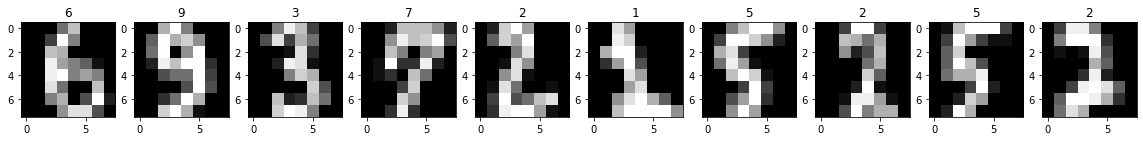

In [163]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(label);

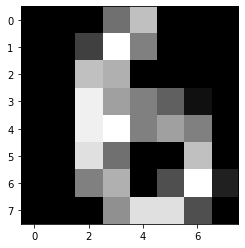

In [164]:
# Si nos fijamos con mayor detalle en la primera que hemos predicho:
first_test_image = x_test[0]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray);

In [165]:
x_test[0]

array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
        0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
        0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.])

In [166]:
x_test

array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 12.,  5.,  0.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0.,  6., 16., ...,  0.,  0.,  0.]])

In [167]:
# Predicción paa una imagen concreta. Como se espera un array bidimensional, y una sola imagen es 1D, lo convertimos pasándoselo como una lista
# de él mismo:
logisticRegr.predict([x_test[0]])

array([6])

In [168]:
y_test.shape

(450,)

In [169]:
y_test[0:10]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [170]:
logisticRegr.predict(x_test[0:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

Vamos a ir ahora con una que veamos que falle:

In [171]:
y_pred = logisticRegr.predict(x_test)
fallos = []
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        fallos.append(i)
fallos

[52, 100, 133, 149, 159, 222, 234, 239, 244, 339, 426, 431]

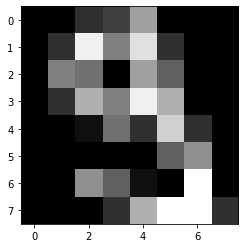

In [172]:
# ¿Qué está pasando en el 52?:
first_test_image = x_test[52]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray);

In [173]:
logisticRegr.predict(x_test[52].reshape(1, -1))

array([3])

Pues es un 9 y estamos prediciendo que es un 3 (cosa para nada descabellada, todo sea dicho).

### Midiendo el modelo:

Para medir el modelo podemos utilizar varias métricas. Estamos ante un modelo de clasificación, por lo que toda métrica basada en la matriz de confusión estará bien.

A continuación, calcularemos tanto la matriz de confusión como la medida de accuracy:

In [174]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

97.33333333333334 %


### Matriz de confusión

Eje horizontal: falso positivo

Eje vertical: falso negativo

In [175]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  1,  0],
       [ 0,  2,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 57,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 37,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 46]], dtype=int64)

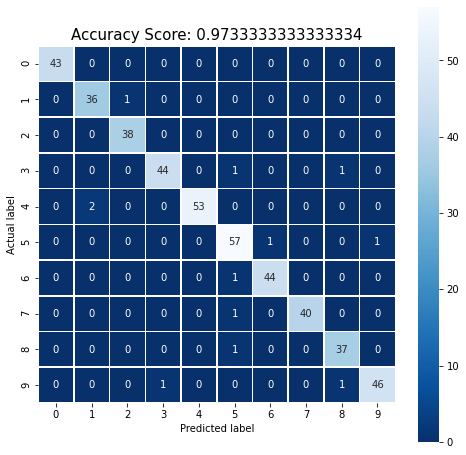

In [176]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

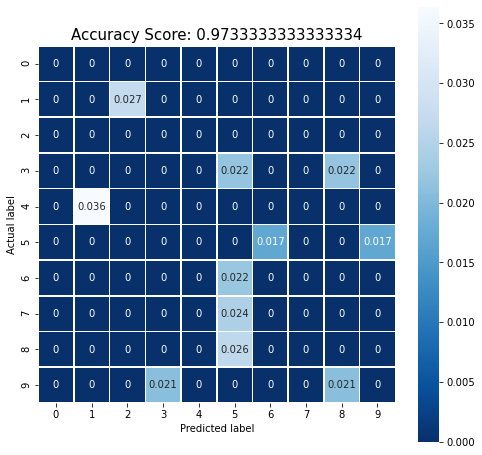

In [177]:
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(8,8))
sns.heatmap(norm_conf_mx, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### EJERCICIO

1. ¿Recuerdas que habíamos visto otras formas de medir? Las que vimos en clase y que teníamos disponibles en [sklearn.metrics](#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)? Pues puedes usarlas en este modelo. Y recuerda que estamos ante un problema de clasificación.

In [178]:
from sklearn.metrics import 

SyntaxError: invalid syntax (<ipython-input-178-f83adfeb5910>, line 1)

2. Vamos a simular que la capturadora que recoge los números que queremos validar tiene unos cuántos píxeles muertos y no funciona bien. Los píxeles que no funcionarán serán los de la penúltima fila vertical. Sabiendo que lo que significan los puntos es la escala de color negro (0) -> blanco (16), modifica X_test para simular ese fallo y comprueba si el modelo sigue prediciendo bien, para lo que deberás sacar el accuracy en una matriz de confusión.

Recuerda que lo que muestra cada registro es la intensidad de cada pixel. Cada imagen está formada por fotos de 64 bits, repartidos desde arriba a la izquierda hasta abajo a la derecha, donde cada 8 columnas serán cada una de las 8 filas de la imagen.

3. Repite esto mismo pero simulando problemas en la calidad de la imagen (sí, más aún de lo que hay). Para ello, modifica X_test añadiendo entre 0 y 10 pixels erróneos, que deberán tomar valores aleatorios entre 0 y 16 para sustituir a los pixels originales. En primer lugar, simularemos el número de pixels afectados por cada registro. Luego, obtendremos las posiiones de cada uno de ellos (podemos simular random sin reemplazo eligiendo de una lista dada de valores). Finalmente, para cada uno, seleccionaremos un valor aleatorio entre 0 y 16.

Mídelo y compáralo con los 2 anteriores.

### EJERCICIO

Hemos visto algunos ejemplos basados en imágenes. Normalmente, se usan otros algoritmos más sofisticados para todo lo que tenga que ver con la imagen debido a su composición. Sin embargo, vamos a jugar un poco más con esto y vamos a probar a ver si somos capaces de realizar un script que me permita diferenciar el tipo del pokémon en base a su imagen.

Para ello, te dejo aquí estas funciones para convertir de imagen a datos y de datos a imagen, así como de la creación del DataFrame sobre el que trabajar:

In [584]:
def image_to_data(img_path):
    # img_path es la dirección de la imagen:
    return plt.imread(img_path).reshape(1, 4800)

def data_to_image(img_array):
    # img_array es un array con los datos de la imagen
    return plt.imshow(np.reshape(img_array, (30, 40, 4)), cmap=plt.cm.gray)
    

Nos creamos un DataFrame para convertir todas las imágenes en datos:

In [585]:
df = pd.DataFrame(columns=list(range(0, 4800)))

for i in range(1, 152):
    new_reg = pd.DataFrame(plt.imread(f"data/pkmn/{i}.png").reshape(1, 4800), index=[i])
    df = df.append(new_reg)


In [586]:
df

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
1,0.352941,0.54902,0.807843,0.0,0.352941,0.54902,0.807843,0.0,0.352941,0.54902,...,0.807843,0.0,0.352941,0.54902,0.807843,0.0,0.352941,0.54902,0.807843,0.0
2,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0
3,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0
4,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0
5,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0
148,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0
149,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0
150,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0


In [587]:
# Y un diccoinario de tipos que nos vendrá bien en el futuro:
id_to_type = {0: 'Grass',
 1: 'Fire',
 2: 'Water',
 3: 'Bug',
 4: 'Normal',
 5: 'Poison',
 6: 'Electric',
 7: 'Ground',
 8: 'Fairy',
 9: 'Fighting',
 10: 'Psychic',
 11: 'Rock',
 12: 'Ghost',
 13: 'Ice',
 14: 'Dragon'}

type_to_id = {'Grass': 0,
 'Fire': 1,
 'Water': 2,
 'Bug': 3,
 'Normal': 4,
 'Poison': 5,
 'Electric': 6,
 'Ground': 7,
 'Fairy': 8,
 'Fighting': 9,
 'Psychic': 10,
 'Rock': 11,
 'Ghost': 12,
 'Ice': 13,
 'Dragon': 14}


1. Lee el DataFrame de los pokemon original y pégale su tipo 1 a cada imagen de pkmn:

In [588]:
df_poke = pd.read_csv("../../../data/Pokemon.csv", encoding='latin1', index_col='#')
df_poke

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


In [589]:
df = df.join(df_poke['Type 1'])
df

,0,1,2,3,4,5,6,7,8,9,...,4791,4792,4793,4794,4795,4796,4797,4798,4799,Type 1
1,0.352941,0.54902,0.807843,0.0,0.352941,0.54902,0.807843,0.0,0.352941,0.54902,...,0.0,0.352941,0.54902,0.807843,0.0,0.352941,0.54902,0.807843,0.0,Grass
2,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,Grass
3,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,Grass
4,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,Fire
5,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,Dragon
148,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,Dragon
149,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,Dragon
150,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,...,0.0,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,0.0,Psychic


2. 

In [590]:
from sklearn.model_selection import train_test_split

X = df.drop(["Type 1"], 1)
y = df["Type 1"].map(type_to_id)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [601]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=1500)
# el paámetro max_iter hay que establecerlo en un número alto para que converja (si no da errores)

logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1500)

In [602]:
# pd.DataFrame(logisticRegr.predict(X_train)).join(y_train.reset_index(drop=True))

In [603]:
logisticRegr.predict(X_train)

array([12, 10,  3, 13,  0,  2,  4,  4,  5,  2,  3,  5,  2,  3,  7,  1,  2,
        2,  4,  5,  0,  2,  3,  3,  2,  5,  2,  2,  6,  7,  3,  2,  6,  1,
        0,  1,  2,  9,  2,  9,  6,  0, 11, 10,  2,  2, 11,  5,  4,  6,  5,
        4,  6, 11,  3,  6, 12, 14,  0, 10,  4,  3,  7,  2,  2,  1,  2,  7,
       11,  1,  3,  2,  2, 11, 11,  5, 13,  3,  5, 11,  0,  4,  4,  2,  4,
        0,  2,  0,  8, 10,  2,  5, 11,  5,  4,  8,  4, 10,  0,  1,  9,  2,
        3,  7,  4], dtype=int64)

In [604]:
logisticRegr.score(X_train, y_train)

1.0

In [605]:
logisticRegr.score(X_test, y_test)

0.2608695652173913

Como podemos comprobar, los resultados no son excesivamente buenos y observamos mucho overfitting. Para compensarlo, vamos a idear otra forma de atacar este problema. Si investigamos el dataset, nos podemos dar cuenta de que hay un total de 31 intensidades distintas por cada canal (Red/Green/Blue/Alpha), por lo que vamos a ver si contando los puntos de cada canal podemos sacar algo.

La estructura de cada punto de la imagen, según lo que leemos es [R G B A], siendo después convertidos en repeticiones de esa estructura de forma secuencial hasta terminar la imagen de 30x40 pixels.

Se puede conseguir obtener, por cada registro, los diferentes valores para R, para G, para B y para A. Para hacerlo, deberás leer cada registro de manera independiente y centrarte en los 4800 valores que tiene. Tendrás que separar los que pertenezcan a R, los que pertenezcan a G, lo mismo para los de B y también para los de A. Podrías hacer esta primera separación mediante slicing saltando cierto número de pasos y empezando en zonas diferentes para cada color.

Después, una vez tengas una lista (por ejemplo) con cada uno, podrías convertirla a Series y utilizar el value_counts. Tras ello, podrías convertir ese series en un DataFrame cuyas columnas fueran las filas del Series. Podrías probar a convertir en un DataFrame directamente ese series y trasponerlo (haciendo ``df.T``).

Repite esto para cada uno de los 4 posibles valores y concatena los df que te dan (recuerda cambiar los nombres para hacerlo. Podrías renombrar cada columna con <R/G/B/A> + \<valor\>

Una vez lo tengas, podrías meterlo dentro de un bucle for e iterar a lo largo de todos los registros, haciendo algo semejante a lo que tenemos en el for del principio de este ejercicio, pero cambiando lo que acabamos de comentar.


2. Replica, a partir de lo que te doy a continuación, la creación y entrenamiento del modelo. Prueba a ver si mejoramos los resultados en predicción. ¿Obtenemos mejores resultados? ¿Son estables con variaciones como podría ser la semilla? ¿Se te ocurre algún método de poder mejorarlo? ¿Tiene alguna ventaja este método respecto al anterior?


Generamos un nuevo DataFrame (new_df) con todas las columnas posibles:

In [534]:
new_df = pd.DataFrame(columns=['R_0.0',
 'G_0.0',
 'B_0.0',
 'A_0.0',
 'R_0.062745101749897',
 'G_0.062745101749897',
 'B_0.062745101749897',
 'A_0.062745101749897',
 'R_0.09803921729326248',
 'G_0.09803921729326248',
 'B_0.09803921729326248',
 'A_0.09803921729326248',
 'R_0.12941177189350128',
 'G_0.12941177189350128',
 'B_0.12941177189350128',
 'A_0.12941177189350128',
 'R_0.16078431904315948',
 'G_0.16078431904315948',
 'B_0.16078431904315948',
 'A_0.16078431904315948',
 'R_0.1921568661928177',
 'G_0.1921568661928177',
 'B_0.1921568661928177',
 'A_0.1921568661928177',
 'R_0.22745098173618317',
 'G_0.22745098173618317',
 'B_0.22745098173618317',
 'A_0.22745098173618317',
 'R_0.25882354378700256',
 'G_0.25882354378700256',
 'B_0.25882354378700256',
 'A_0.25882354378700256',
 'R_0.29019609093666077',
 'G_0.29019609093666077',
 'B_0.29019609093666077',
 'A_0.29019609093666077',
 'R_0.32156863808631897',
 'G_0.32156863808631897',
 'B_0.32156863808631897',
 'A_0.32156863808631897',
 'R_0.3529411852359772',
 'G_0.3529411852359772',
 'B_0.3529411852359772',
 'A_0.3529411852359772',
 'R_0.38823530077934265',
 'G_0.38823530077934265',
 'B_0.38823530077934265',
 'A_0.38823530077934265',
 'R_0.41960784792900085',
 'G_0.41960784792900085',
 'B_0.41960784792900085',
 'A_0.41960784792900085',
 'R_0.45098039507865906',
 'G_0.45098039507865906',
 'B_0.45098039507865906',
 'A_0.45098039507865906',
 'R_0.48235294222831726',
 'G_0.48235294222831726',
 'B_0.48235294222831726',
 'A_0.48235294222831726',
 'R_0.5176470875740051',
 'G_0.5176470875740051',
 'B_0.5176470875740051',
 'A_0.5176470875740051',
 'R_0.5490196347236633',
 'G_0.5490196347236633',
 'B_0.5490196347236633',
 'A_0.5490196347236633',
 'R_0.5803921818733215',
 'G_0.5803921818733215',
 'B_0.5803921818733215',
 'A_0.5803921818733215',
 'R_0.6117647290229797',
 'G_0.6117647290229797',
 'B_0.6117647290229797',
 'A_0.6117647290229797',
 'R_0.6470588445663452',
 'G_0.6470588445663452',
 'B_0.6470588445663452',
 'A_0.6470588445663452',
 'R_0.6784313917160034',
 'G_0.6784313917160034',
 'B_0.6784313917160034',
 'A_0.6784313917160034',
 'R_0.7098039388656616',
 'G_0.7098039388656616',
 'B_0.7098039388656616',
 'A_0.7098039388656616',
 'R_0.7411764860153198',
 'G_0.7411764860153198',
 'B_0.7411764860153198',
 'A_0.7411764860153198',
 'R_0.772549033164978',
 'G_0.772549033164978',
 'B_0.772549033164978',
 'A_0.772549033164978',
 'R_0.8078431487083435',
 'G_0.8078431487083435',
 'B_0.8078431487083435',
 'A_0.8078431487083435',
 'R_0.8392156958580017',
 'G_0.8392156958580017',
 'B_0.8392156958580017',
 'A_0.8392156958580017',
 'R_0.8705882430076599',
 'G_0.8705882430076599',
 'B_0.8705882430076599',
 'A_0.8705882430076599',
 'R_0.9019607901573181',
 'G_0.9019607901573181',
 'B_0.9019607901573181',
 'A_0.9019607901573181',
 'R_0.9372549057006836',
 'G_0.9372549057006836',
 'B_0.9372549057006836',
 'A_0.9372549057006836',
 'R_0.9686274528503418',
 'G_0.9686274528503418',
 'B_0.9686274528503418',
 'A_0.9686274528503418',
 'R_1.0',
 'G_1.0',
 'B_1.0',
 'A_1.0'])

new_df

,R_0.0,G_0.0,B_0.0,A_0.0,R_0.062745101749897,G_0.062745101749897,B_0.062745101749897,A_0.062745101749897,R_0.09803921729326248,G_0.09803921729326248,...,B_0.9372549057006836,A_0.9372549057006836,R_0.9686274528503418,G_0.9686274528503418,B_0.9686274528503418,A_0.9686274528503418,R_1.0,G_1.0,B_1.0,A_1.0


In [535]:
# Cuando lo tengas diseñado, puedes formar el DataFrame completo así:
dic_color = {0: 'R', 1: 'G', 2: 'B', 3: 'A'}

for i in range(1, 151):
    df_color = pd.DataFrame([df_poke["Type 1"].iloc[i]], columns=['Type 1'])
    for color in range(0, 4):
        try:
            serie = pd.Series(df.iloc[i].values[color::4])
            b = pd.DataFrame(serie.value_counts()).T
            b.columns = [f"{dic_color[color]}_{col}" for col in b.columns]
            df_color = df_color.join(b)
        except:
            print(color)
            print(i)
            print(df_color)
    new_df = new_df.append(df_color)
    


In [536]:
new_df = new_df.fillna(0).reset_index(drop=True)

Prueba a combinar el dataset original con este para ver qué puedes hacer: